## Capstone Project: the battle of the neighborhoods 

### If you're planning a culinary tour in Cologne, this project will have you to choose the best disticts

In [23]:
#imports
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                          \                                            failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|2_73_pypy|3_73_pypy|1_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-mos

In [24]:
#get html from wiki page and create soup object
df = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Cologne#Districts')[1]

In [25]:
df

,Map,Coat,City district,City parts,Area,Population1,Pop. density,District Councils,Town Hall
0,NaN,NaN,District 1 Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",16.4 km²,127.033,7.746/km²,"Bezirksksamt Innenstadt Brückenstraße 19, D-50...",NaN
1,NaN,NaN,District 2 Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",54.6 km²,100.936,1.850/km²,"Bezirksamt Rodenkirchen Hauptstraße 85, D-5099...",NaN
2,NaN,NaN,District 3 Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",41.6 km²,137.552,3.308/km²,"Bezirksamt Lindenthal Aachener Straße 220, 509...",NaN
3,NaN,NaN,District 4 Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",23.8 km²,103.621,4.348/km²,"Bezirksamt Ehrenfeld Venloer Straße 419 – 421,...",NaN
4,NaN,NaN,District 5 Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",31.8 km²,110.092,3.462/km²,"Bezirksamt NippesNeusser Straße 450,D-50733 Köln",NaN
5,NaN,NaN,District 6 Köln-Chorweiler,"Blumenberg, Chorweiler, Esch/Auweiler, Fühling...",67.2 km²,80.870,1.204/km²,"Bezirksamt Chorweiler Pariser Platz 1, D-50765...",NaN
6,NaN,NaN,District 7 Köln-Porz,"Eil, Elsdorf, Ensen, Finkenberg, Gremberghoven...",78.8 km²,106.520,1.352/km²,"Bezirksamt PorzFriedrich-Ebert-Ufer 64–70, D-5...",NaN
7,NaN,NaN,District 8 Köln-Kalk,"Brück, Höhenberg, Humboldt/Gremberg, Kalk, Mer...",38.2 km²,108.330,2.841/km²,"Bezirksamt KalkKalker Hauptstraße 247–273,D-51...",NaN
8,NaN,NaN,District 9 Köln-Mülheim,"Buchforst, Buchheim, Dellbrück, Dünnwald, Flit...",52.2 km²,144.374,2.764/km²,"Bezirksamt Mülheim Wiener Platz 2a,D-51065 Köln",NaN
9,NaN,NaN,Cologne,NaN,405.15 km2,1.019.3282,2.516/km2,2.516/km2,2.516/km2


## Data Cleanup

In [26]:
df.drop("Map", axis=1, inplace=True)

In [27]:
df.drop("Coat", axis=1, inplace=True)

In [28]:
df.drop("Town Hall", axis=1, inplace=True)

In [29]:
df["City district"]=df["City district"].str[11:]

In [30]:
df.head(12)

,City district,City parts,Area,Population1,Pop. density,District Councils
0,Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",16.4 km²,127.033,7.746/km²,"Bezirksksamt Innenstadt Brückenstraße 19, D-50..."
1,Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",54.6 km²,100.936,1.850/km²,"Bezirksamt Rodenkirchen Hauptstraße 85, D-5099..."
2,Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",41.6 km²,137.552,3.308/km²,"Bezirksamt Lindenthal Aachener Straße 220, 509..."
3,Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",23.8 km²,103.621,4.348/km²,"Bezirksamt Ehrenfeld Venloer Straße 419 – 421,..."
4,Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",31.8 km²,110.092,3.462/km²,"Bezirksamt NippesNeusser Straße 450,D-50733 Köln"
5,Köln-Chorweiler,"Blumenberg, Chorweiler, Esch/Auweiler, Fühling...",67.2 km²,80.870,1.204/km²,"Bezirksamt Chorweiler Pariser Platz 1, D-50765..."
6,Köln-Porz,"Eil, Elsdorf, Ensen, Finkenberg, Gremberghoven...",78.8 km²,106.520,1.352/km²,"Bezirksamt PorzFriedrich-Ebert-Ufer 64–70, D-5..."
7,Köln-Kalk,"Brück, Höhenberg, Humboldt/Gremberg, Kalk, Mer...",38.2 km²,108.330,2.841/km²,"Bezirksamt KalkKalker Hauptstraße 247–273,D-51..."
8,Köln-Mülheim,"Buchforst, Buchheim, Dellbrück, Dünnwald, Flit...",52.2 km²,144.374,2.764/km²,"Bezirksamt Mülheim Wiener Platz 2a,D-51065 Köln"
9,,NaN,405.15 km2,1.019.3282,2.516/km2,2.516/km2


In [31]:
df.drop([10], inplace=True)

In [32]:
df.drop([9], inplace=True)

In [33]:
df.shape


(9, 6)

### Getting Geospatial data from Foursquare


In [34]:
!conda install -c conda-forge geopy --yes


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='2_73_pypy|3_73_pypy|1_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your

In [35]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Cologne_data")

df['Dist_Coord']= df['City district'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Dist_Coord'].apply(pd.Series)

df.drop(['Dist_Coord'], axis=1, inplace=True)
df

,City district,City parts,Area,Population1,Pop. density,District Councils,Latitude,Longitude
0,Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",16.4 km²,127.033,7.746/km²,"Bezirksksamt Innenstadt Brückenstraße 19, D-50...",50.937328,6.959234
1,Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",54.6 km²,100.936,1.850/km²,"Bezirksamt Rodenkirchen Hauptstraße 85, D-5099...",50.863634,6.969234
2,Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",41.6 km²,137.552,3.308/km²,"Bezirksamt Lindenthal Aachener Straße 220, 509...",50.935935,6.871246
3,Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",23.8 km²,103.621,4.348/km²,"Bezirksamt Ehrenfeld Venloer Straße 419 – 421,...",50.951502,6.916529
4,Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",31.8 km²,110.092,3.462/km²,"Bezirksamt NippesNeusser Straße 450,D-50733 Köln",50.958994,6.941777
5,Köln-Chorweiler,"Blumenberg, Chorweiler, Esch/Auweiler, Fühling...",67.2 km²,80.870,1.204/km²,"Bezirksamt Chorweiler Pariser Platz 1, D-50765...",51.021167,6.898034
6,Köln-Porz,"Eil, Elsdorf, Ensen, Finkenberg, Gremberghoven...",78.8 km²,106.520,1.352/km²,"Bezirksamt PorzFriedrich-Ebert-Ufer 64–70, D-5...",50.906705,6.999129
7,Köln-Kalk,"Brück, Höhenberg, Humboldt/Gremberg, Kalk, Mer...",38.2 km²,108.330,2.841/km²,"Bezirksamt KalkKalker Hauptstraße 247–273,D-51...",50.931923,7.005806
8,Köln-Mülheim,"Buchforst, Buchheim, Dellbrück, Dünnwald, Flit...",52.2 km²,144.374,2.764/km²,"Bezirksamt Mülheim Wiener Platz 2a,D-51065 Köln",50.958147,7.013526


### Building clusters of the neighborhoods

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [69]:
!pip install folium
import folium # map rendering library

In [70]:
#Getting coordinates of Cologne
address = 'Cologne'

geolocator = Nominatim(user_agent="Cologne_restaurants")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cologne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cologne are 50.938361, 6.959974.


In [71]:
# create map of Cologne using latitude and longitude 
map_cologne = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['City district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_cologne) 
    
map_cologne

In [72]:
CLIENT_ID = 'S5OYSQXG12LA3BQIII23CNSA2MZBTK2XSZMDZKFHZ44JKM3Z' # your Foursquare ID
CLIENT_SECRET = 'IRBG1WQOPABKSMDVMPRNJFI4XDH3CCDHR0FM3BLQDX0JODDV' # your Foursquare Secret
VERSION = '20201103' # Foursquare API version

In [73]:
df.loc[0, 'City district']

'Köln-Innenstadt'

### Now, let's get the top 100 venues that are in Cologne within a radius of 500 meters

In [74]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'City district'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Köln-Innenstadt are 50.93732845, 6.959234323073302.


In [75]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=S5OYSQXG12LA3BQIII23CNSA2MZBTK2XSZMDZKFHZ44JKM3Z&client_secret=IRBG1WQOPABKSMDVMPRNJFI4XDH3CCDHR0FM3BLQDX0JODDV&v=20201103&ll=50.93732845,6.959234323073302&radius=500&limit=100'

In [76]:
results = requests.get(url).json()

In [77]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [78]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Craftbeer Corner,Beer Bar,50.937222,6.958928
1,LEGO Store,Toy / Game Store,50.937042,6.956564
2,Papa Joe's Jazzlokal,Jazz Club,50.937882,6.962241
3,Ice Cream United,Ice Cream Shop,50.935520,6.960180
4,Alter Markt,Plaza,50.938623,6.960070
5,Heumarkt,Plaza,50.936161,6.960461
6,Apple Schildergasse,Electronics Store,50.936552,6.955877
7,Wallraf-Richartz-Museum,Art Museum,50.937425,6.958523
8,Dorint Hotel am Heumarkt Köln,Hotel,50.935408,6.957729
9,Servus Colonia Alpina,Bavarian Restaurant,50.937423,6.959806


In [79]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

93 venues were returned by Foursquare.


In [80]:
print ('{} unique categories in Cologne'.format(nearby_venues['categories'].value_counts().shape[0]))

58 unique categories in Cologne


In [81]:
print (nearby_venues['categories'].value_counts()[0:10])

Hotel                 7
Brewery               5
Italian Restaurant    4
Art Museum            4
Café                  4
Plaza                 4
Clothing Store        3
Steakhouse            2
Coffee Shop           2
Department Store      2
Name: categories, dtype: int64


### Explore Neighborhoods in Cologne

In [82]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [83]:
Cologne_venues = getNearbyVenues(names=df["City district"],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Köln-Innenstadt
Köln-Rodenkirchen
Köln-Lindenthal
Köln-Ehrenfeld
Köln-Nippes
Köln-Chorweiler
Köln-Porz
Köln-Kalk
Köln-Mülheim


In [84]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Cologne_Venues_only_restaurant = Cologne_venues[Cologne_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Cologne_Venues_only_restaurant.index = np.arange(1, len(Cologne_Venues_only_restaurant )+1)

In [106]:
print (Cologne_Venues_only_restaurant['Venue Category'].value_counts())

Italian Restaurant               10
Restaurant                        3
Tapas Restaurant                  3
Indian Restaurant                 3
Greek Restaurant                  2
Lebanese Restaurant               2
Chinese Restaurant                2
Fast Food Restaurant              2
Turkish Restaurant                2
Kebab Restaurant                  2
Modern European Restaurant        2
Falafel Restaurant                1
Ethiopian Restaurant              1
Seafood Restaurant                1
Thai Restaurant                   1
Bavarian Restaurant               1
Theme Restaurant                  1
German Restaurant                 1
Mediterranean Restaurant          1
Doner Restaurant                  1
Vegetarian / Vegan Restaurant     1
Portuguese Restaurant             1
Scandinavian Restaurant           1
Eastern European Restaurant       1
Name: Venue Category, dtype: int64


In [107]:
print('There are {} uniques categories.'.format(len(Cologne_Venues_only_restaurant['Venue Category'].unique())))

There are 24 uniques categories.


In [108]:
# create a dataframe of top 10 categories
Cologne_5_Dist_Venues_Top10 = Cologne_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Cologne_5_Dist_Venues_Top10=Cologne_5_Dist_Venues_Top10.reset_index()
#Cologne_5_Dist_Venues_Top10

Cologne_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Cologne_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Italian Restaurant,10
1,Restaurant,3
2,Tapas Restaurant,3
3,Indian Restaurant,3
4,Greek Restaurant,2
5,Lebanese Restaurant,2
6,Chinese Restaurant,2
7,Fast Food Restaurant,2
8,Turkish Restaurant,2
9,Kebab Restaurant,2


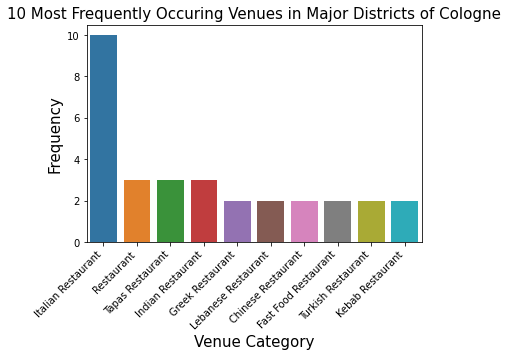

<Figure size 1296x504 with 0 Axes>

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Cologne_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Major Districts of Cologne', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### Let's check the size of the resulting dataframe

In [110]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Cologne_Venues_only_restaurant.shape)
Cologne_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (46, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Köln-Innenstadt,50.937328,6.959234,Servus Colonia Alpina,50.937423,6.959806,Bavarian Restaurant
2,Köln-Innenstadt,50.937328,6.959234,Beirut,50.936925,6.962338,Lebanese Restaurant
3,Köln-Innenstadt,50.937328,6.959234,Sattgrün,50.938441,6.954965,Vegetarian / Vegan Restaurant
4,Köln-Innenstadt,50.937328,6.959234,Frites Belgique,50.937880,6.956242,Fast Food Restaurant
5,Köln-Innenstadt,50.937328,6.959234,Via Sistina An Farina,50.938028,6.957819,Italian Restaurant
6,Köln-Innenstadt,50.937328,6.959234,El Chango,50.936687,6.956840,Chinese Restaurant
7,Köln-Innenstadt,50.937328,6.959234,Hard Rock Cafe Köln,50.936113,6.957790,Theme Restaurant
8,Köln-Innenstadt,50.937328,6.959234,Rosendorn,50.937798,6.961120,Tapas Restaurant
9,Köln-Innenstadt,50.937328,6.959234,Herings im Martinswinkel,50.938387,6.962427,Seafood Restaurant
10,Köln-Innenstadt,50.937328,6.959234,Mederrano,50.934700,6.959254,Mediterranean Restaurant


In [111]:
Cologne_Venues_restaurant = Cologne_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

### Analyze Each Neighborhood


In [118]:
Cologne_Venues_restaurant


Neighborhood
Köln-Chorweiler       1
Köln-Ehrenfeld       18
Köln-Innenstadt      18
Köln-Kalk             1
Köln-Lindenthal       2
Köln-Mülheim          4
Köln-Nippes           1
Köln-Rodenkirchen     1
Name: Venue Category, dtype: int64

In [129]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [130]:
Cologne_Venues_restaurant_df  = Cologne_Venues_restaurant.to_frame().reset_index()
Cologne_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Cologne_Venues_restaurant_df.index = np.arange(1, len(Cologne_Venues_restaurant_df)+1)
list_rest_no =Cologne_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Cologne_Venues_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

In [133]:
# one hot encoding
Cologne_onehot = pd.get_dummies(Cologne_Venues_only_restaurant['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cologne_onehot['Neighborhood'] = Cologne_Venues_only_restaurant['Neighborhood'] 

# define a list of column names
cols = Cologne_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
Cologne_onehot = Cologne_onehot.reindex(columns= cols)

#check result
Cologne_onehot.head()

,Neighborhood,Bavarian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Modern European Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
1,Köln-Innenstadt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Köln-Innenstadt,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Köln-Innenstadt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Köln-Innenstadt,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Köln-Innenstadt,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
# And let's examine the new dataframe size.
Cologne_onehot.shape

(46, 25)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [135]:
Cologne_grouped = Cologne_onehot.groupby('Neighborhood').mean().reset_index()
Cologne_grouped

,Neighborhood,Bavarian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Modern European Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Köln-Chorweiler,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Köln-Ehrenfeld,0.000000,0.000000,0.00,0.000000,0.055556,0.055556,0.000000,0.055556,0.00,0.055556,0.166667,0.111111,0.055556,0.000000,0.055556,0.055556,0.111111,0.0,0.000000,0.111111,0.055556,0.000000,0.055556,0.000000
2,Köln-Innenstadt,0.055556,0.055556,0.00,0.055556,0.000000,0.000000,0.055556,0.000000,0.00,0.111111,0.222222,0.000000,0.055556,0.055556,0.055556,0.000000,0.055556,0.0,0.055556,0.055556,0.000000,0.055556,0.000000,0.055556
3,Köln-Kalk,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Köln-Lindenthal,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Köln-Mülheim,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,Köln-Nippes,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Köln-Rodenkirchen,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [136]:
#Let's confirm the new size
Cologne_grouped.shape

(8, 25)

### Let's print each neighborhood along with the top 5 most common venues

In [137]:
num_top_venues = 5

for hood in Cologne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Cologne_grouped[Cologne_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Köln-Chorweiler----
                      venue  freq
0      Fast Food Restaurant   1.0
1       Bavarian Restaurant   0.0
2  Mediterranean Restaurant   0.0
3        Turkish Restaurant   0.0
4          Theme Restaurant   0.0


----Köln-Ehrenfeld----
                 venue  freq
0   Italian Restaurant  0.17
1           Restaurant  0.11
2     Tapas Restaurant  0.11
3     Kebab Restaurant  0.11
4  Lebanese Restaurant  0.06


----Köln-Innenstadt----
                 venue  freq
0   Italian Restaurant  0.22
1    Indian Restaurant  0.11
2  Bavarian Restaurant  0.06
3     Theme Restaurant  0.06
4     Tapas Restaurant  0.06


----Köln-Kalk----
                      venue  freq
0          Greek Restaurant   1.0
1       Bavarian Restaurant   0.0
2  Mediterranean Restaurant   0.0
3        Turkish Restaurant   0.0
4          Theme Restaurant   0.0


----Köln-Lindenthal----
                      venue  freq
0        Italian Restaurant   1.0
1       Bavarian Restaurant   0.0
2  Mediterranean Rest

### Let's put that into a pandas dataframe

In [138]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [139]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cologne_grouped['Neighborhood']

for ind in np.arange(Cologne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cologne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Köln-Chorweiler,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Köln-Ehrenfeld,Italian Restaurant,Kebab Restaurant,Tapas Restaurant,Restaurant,Ethiopian Restaurant,Falafel Restaurant,Indian Restaurant,Turkish Restaurant,Lebanese Restaurant,Portuguese Restaurant
2,Köln-Innenstadt,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Chinese Restaurant,Eastern European Restaurant,Fast Food Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Bavarian Restaurant
3,Köln-Kalk,Greek Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
4,Köln-Lindenthal,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
5,Köln-Mülheim,Turkish Restaurant,Doner Restaurant,Greek Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
6,Köln-Nippes,Chinese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
7,Köln-Rodenkirchen,Scandinavian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant


### Now let's create the new dataframe and display the top 10 venues for each neighborhood


In [142]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cologne_grouped['Neighborhood']

for ind in np.arange(Cologne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cologne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Köln-Chorweiler,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Köln-Ehrenfeld,Italian Restaurant,Kebab Restaurant,Tapas Restaurant,Restaurant,Ethiopian Restaurant,Falafel Restaurant,Indian Restaurant,Turkish Restaurant,Lebanese Restaurant,Portuguese Restaurant
2,Köln-Innenstadt,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Chinese Restaurant,Eastern European Restaurant,Fast Food Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Bavarian Restaurant
3,Köln-Kalk,Greek Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
4,Köln-Lindenthal,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
5,Köln-Mülheim,Turkish Restaurant,Doner Restaurant,Greek Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
6,Köln-Nippes,Chinese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
7,Köln-Rodenkirchen,Scandinavian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant


## Cluster Neighborhoods


### Run k-means to cluster the neighborhood into 5 clusters.

In [158]:
# set number of clusters
kclusters = 5

Cologne_grouped_clustering = Cologne_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cologne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 0, 1, 1, 3, 4], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [163]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

Cologne_merged = df

Cologne_merged.rename(columns={'City district':'Neighborhood'}, inplace=True)

# merge Cologne_grouped with cologne_data to add latitude/longitude for each neighborhood
Cologne_merged = Cologne_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Cologne_merged.head() # check the last columns!

,Neighborhood,City parts,Area,Population1,Pop. density,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",16.4 km²,127.033,7.746/km²,"Bezirksksamt Innenstadt Brückenstraße 19, D-50...",50.937328,6.959234,1.0,1.0,1.0,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Chinese Restaurant,Eastern European Restaurant,Fast Food Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Bavarian Restaurant
1,Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",54.6 km²,100.936,1.850/km²,"Bezirksamt Rodenkirchen Hauptstraße 85, D-5099...",50.863634,6.969234,4.0,4.0,4.0,Scandinavian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
2,Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",41.6 km²,137.552,3.308/km²,"Bezirksamt Lindenthal Aachener Straße 220, 509...",50.935935,6.871246,1.0,1.0,1.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
3,Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",23.8 km²,103.621,4.348/km²,"Bezirksamt Ehrenfeld Venloer Straße 419 – 421,...",50.951502,6.916529,1.0,1.0,1.0,Italian Restaurant,Kebab Restaurant,Tapas Restaurant,Restaurant,Ethiopian Restaurant,Falafel Restaurant,Indian Restaurant,Turkish Restaurant,Lebanese Restaurant,Portuguese Restaurant
4,Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",31.8 km²,110.092,3.462/km²,"Bezirksamt NippesNeusser Straße 450,D-50733 Köln",50.958994,6.941777,3.0,3.0,3.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant


## Examine the Clusters

### Cluster 1

In [178]:
Cologne_merged.loc[Cologne_merged['Cluster Labels'] == 0, Cologne_merged.columns[[1] + list(range(5, Cologne_merged.shape[1]))]]

,City parts,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Brück, Höhenberg, Humboldt/Gremberg, Kalk, Mer...","Bezirksamt KalkKalker Hauptstraße 247–273,D-51...",50.931923,7.005806,0.0,0.0,0.0,Greek Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant


### Cluster 2

In [168]:
Cologne_merged.loc[Cologne_merged['Cluster Labels'] == 1, Cologne_merged.columns[[1] + list(range(5, Cologne_merged.shape[1]))]]

,City parts,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...","Bezirksksamt Innenstadt Brückenstraße 19, D-50...",50.937328,6.959234,1.0,1.0,1.0,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Chinese Restaurant,Eastern European Restaurant,Fast Food Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Bavarian Restaurant
2,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...","Bezirksamt Lindenthal Aachener Straße 220, 509...",50.935935,6.871246,1.0,1.0,1.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
3,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...","Bezirksamt Ehrenfeld Venloer Straße 419 – 421,...",50.951502,6.916529,1.0,1.0,1.0,Italian Restaurant,Kebab Restaurant,Tapas Restaurant,Restaurant,Ethiopian Restaurant,Falafel Restaurant,Indian Restaurant,Turkish Restaurant,Lebanese Restaurant,Portuguese Restaurant
8,"Buchforst, Buchheim, Dellbrück, Dünnwald, Flit...","Bezirksamt Mülheim Wiener Platz 2a,D-51065 Köln",50.958147,7.013526,1.0,1.0,1.0,Turkish Restaurant,Doner Restaurant,Greek Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant


### Cluster 3

In [170]:
Cologne_merged.loc[Cologne_merged['Cluster Labels'] == 2, Cologne_merged.columns[[1] + list(range(5, Cologne_merged.shape[1]))]]

,City parts,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Blumenberg, Chorweiler, Esch/Auweiler, Fühling...","Bezirksamt Chorweiler Pariser Platz 1, D-50765...",51.021167,6.898034,2.0,2.0,2.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant


### Cluster 4

In [173]:
Cologne_merged.loc[Cologne_merged['Cluster Labels'] == 3, Cologne_merged.columns[[1] + list(range(5, Cologne_merged.shape[1]))]]

,City parts,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...","Bezirksamt NippesNeusser Straße 450,D-50733 Köln",50.958994,6.941777,3.0,3.0,3.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant


### Cluster 5

In [176]:
Cologne_merged.loc[Cologne_merged['Cluster Labels'] == 4, Cologne_merged.columns[[1] + list(range(5, Cologne_merged.shape[1]))]]

,City parts,District Councils,Latitude,Longitude,Cluster_Labels,Cluster Label2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...","Bezirksamt Rodenkirchen Hauptstraße 85, D-5099...",50.863634,6.969234,4.0,4.0,4.0,Scandinavian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant


## Discussion

## Conclusion